<a href="https://colab.research.google.com/github/SovetovAleksey/Probability-theory/blob/course_project/Course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Проверить гипотезу: Фильмы, снятые до 1990 года, в среднем имеют более высокую оценку, чем фильмы, снятые позже.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
df = pd.read_csv('/content/sample_data/kinopoisk-top250.csv')
df.head()

,rating,movie,year,country,rating_ball,overview,director,screenwriter,actors,url_logo
0,0,Побег из Шоушенка,1994,США,9.111,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Тим Роббинс; Морган Фриман; Боб Гантон; Уильям...,'https://st.kp.yandex.net/images/film_iphone/i...
1,1,Зеленая миля,1999,США,9.062,Пол Эджкомб — начальник блока смертников в тюр...,Фрэнк Дарабонт,Фрэнк Дарабонт; Стивен Кинг,Том Хэнкс; Дэвид Морс; Бонни Хант; Майкл Кларк...,'https://st.kp.yandex.net/images/film_iphone/i...
2,2,Форрест Гамп,1994,США,8.913,От лица главного героя Форреста Гампа; слабоум...,Роберт Земекис,Эрик Рот; Уинстон Грум,Том Хэнкс; Робин Райт; Салли Филд; Гэри Синиз;...,'https://st.kp.yandex.net/images/film_iphone/i...
3,3,Список Шиндлера,1993,США,8.817,Фильм рассказывает реальную историю загадочног...,Стивен Спилберг,Стивен Зеллиан; Томас Кенилли,Лиам Нисон; Бен Кингсли; Рэйф Файнс; Кэролайн ...,'https://st.kp.yandex.net/images/film_iphone/i...
4,4,1+1,2011,Франция,8.807,Пострадав в результате несчастного случая; бог...,Оливье Накаш; Эрик Толедано,Оливье Накаш; Филипп Поццо ди Борго; Эрик Т...,Франсуа Клюзе; Омар Си; Анн Ле Ни; Одри Флеро;...,'https://st.kp.yandex.net/images/film_iphone/i...


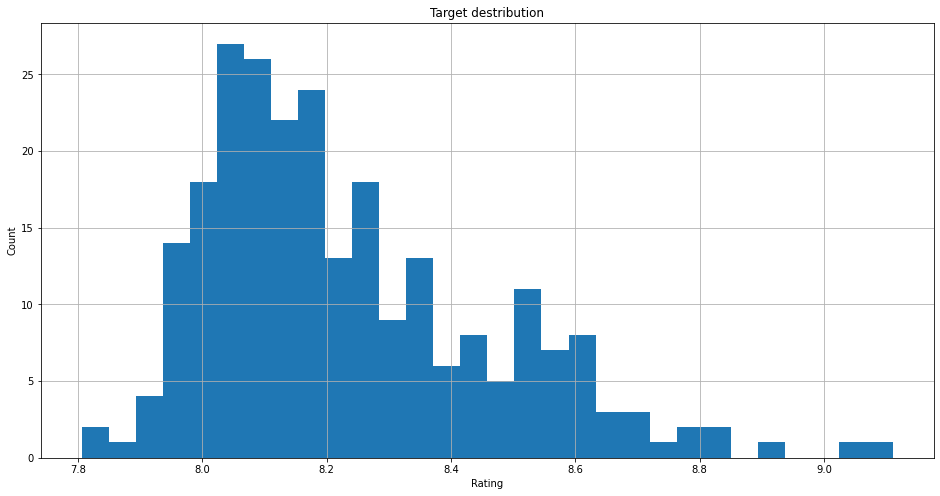

In [7]:
plt.figure(figsize = (16, 8))

df['rating_ball'].hist(bins = 30)
plt.xlabel('Rating')
plt.ylabel('Count')

plt.title('Target destribution')
plt.show()

Отберем фильмы снятые до 1990 года и после

In [8]:
before_1990 = df[df['year'] <= 1990]['rating_ball']
before_1990.head()

9     8.782
12    8.732
14    8.712
20    8.626
23    8.516
Name: rating_ball, dtype: float64

In [9]:
after_1990 = df[df['year'] > 1990]['rating_ball'][:53:-1]
after_1990.head()

246    8.007
244    8.063
242    7.806
239    7.934
238    7.948
Name: rating_ball, dtype: float64

# 1. Проверка гипотезы

Постановка гипотезы

In [10]:
before_1990_mean = before_1990.mean()
after_1990_mean = after_1990.mean()
before_1990_mean, after_1990_mean

(8.266326530612243, 8.062326530612246)

$$H0: 8.266326530612243 = 8.062326530612246$$
$$H1: 8.266326530612243 > 8.062326530612246$$

In [11]:
after_1990_std = after_1990.std(ddof = 1)
after_1990_std

0.1019047235947973

$$\alpha = 0,05, n = 98, \sigma = 0.1019047235947973$$

$$Z_{H} = \dfrac{\overline{X} - m}{\sigma_X / \sqrt{n}} = \frac{8.062326530612246 - 8.266326530612243}{0.1019047235947973 / \sqrt{98}} = -19.817501052246172$$

$$Z_m = 1.645$$

$$Z_{H} \in [-1.645; +1.645]$$

Наше значение не попало в интервал, так что отвергаем нулевую гипотезу и принимаем альтернативную

# 2. Мода, медиана, квартили, дисперсия

Найдем моду, медиану, квартили и дисперсию годов, в которые снимались фильмы

In [19]:
df['year'].mode()

0    2001
dtype: int64

In [18]:
df['year'].median()

1997.5

In [16]:
df['year'].quantile(0.25), df['year'].quantile(0.75)

(1980.0, 2005.0)

In [17]:
df['year'].var()

361.57661044176706